# Investigating Enron Dataset
## Machine Learning Course from Udacity Data Analyst Nanodegree

This is the final project for the machine learning course. Enron financial data and email data will be investigated to find the list of person of interest (POI) who was involved in the fraud activities.

Below is the order of the investigation process I will employ for this final project.
- Use univariate and multivariate analysis to guess which features can be used to find POIs
- Processing dataset (taking care of missing values and outliers)
- Dimension reduction through PCA
- Try a variety of classfiers

First, necessary Libraries will be loaded.

In [25]:
#!/usr/bin/python

import sys
import pickle
import pprint
import matplotlib.pyplot as plt

### Setting the path
sys.path.append("../tools/")

### These are the scripts given in the class
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

Load the dictionary containing the dataset.

In [5]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [16]:
len(data_dict)

146

There are total 146 number of data in data_dict. I am going to print out the first two of the data from data_dict to see how the dictionary looks like.

In [19]:
stop = 0
for k, v in data_dict.iteritems():
    print k
    pprint.pprint(v)
    if stop == 1:
        break
    stop += 1

METTS MARK
{'bonus': 600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'mark.metts@enron.com',
 'exercised_stock_options': 'NaN',
 'expenses': 94299,
 'from_messages': 29,
 'from_poi_to_this_person': 38,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 1740,
 'poi': False,
 'restricted_stock': 585062,
 'restricted_stock_deferred': 'NaN',
 'salary': 365788,
 'shared_receipt_with_poi': 702,
 'to_messages': 807,
 'total_payments': 1061827,
 'total_stock_value': 585062}
BAXTER JOHN C
{'bonus': 1200000,
 'deferral_payments': 1295738,
 'deferred_income': -1386055,
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 6680544,
 'expenses': 11200,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 1586055,
 'other': 2660303,
 'poi': False,
 'restricted_stock': 3942714,
 'rest

The keys of data_dict are the names of people and the values are various features. Every feature except poi and email_address are numerical values. It looks like it is either a number of 'NaN' when the data is missing. And poi is a boolean value that I can use to find POI's.

In [36]:
### Finding the number of features
for k,v in data_dict.iteritems():
    print "The number of features:", len(v)
    features_list = v.keys() # features are saved separately for later use
    break

The number of features: 21


There are total 21 features in the dataset. I will ignore "poi" and "email_address" because they are not numerical values. And I will ingore 'other' as well because I don't know what this is. Then, I will draw histograms for the rest of the features.

In [72]:
### Removing poi and email_address
try:
    features_list.remove("poi")
    features_list.remove("email_address")
    features_list.remove("other")
except:
    pass

### Convert data_dict into numpy array
data = featureFormat(data_dict, features_list)
print data

[[  3.65788000e+05   8.07000000e+02   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   3.80000000e+01]
 [  2.67102000e+05   0.00000000e+00   1.29573800e+06 ...,  -1.38605500e+06
    1.58605500e+06   0.00000000e+00]
 [  1.70941000e+05   0.00000000e+00   0.00000000e+00 ...,  -4.00729000e+05
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  2.65214000e+05   5.33000000e+02   2.27449000e+05 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.78601000e+05   8.65000000e+02   0.00000000e+00 ...,  -3.00000000e+05
    0.00000000e+00   1.88000000e+02]
 [  2.74975000e+05   8.73000000e+02   0.00000000e+00 ...,   0.00000000e+00
    7.10230000e+04   5.20000000e+01]]


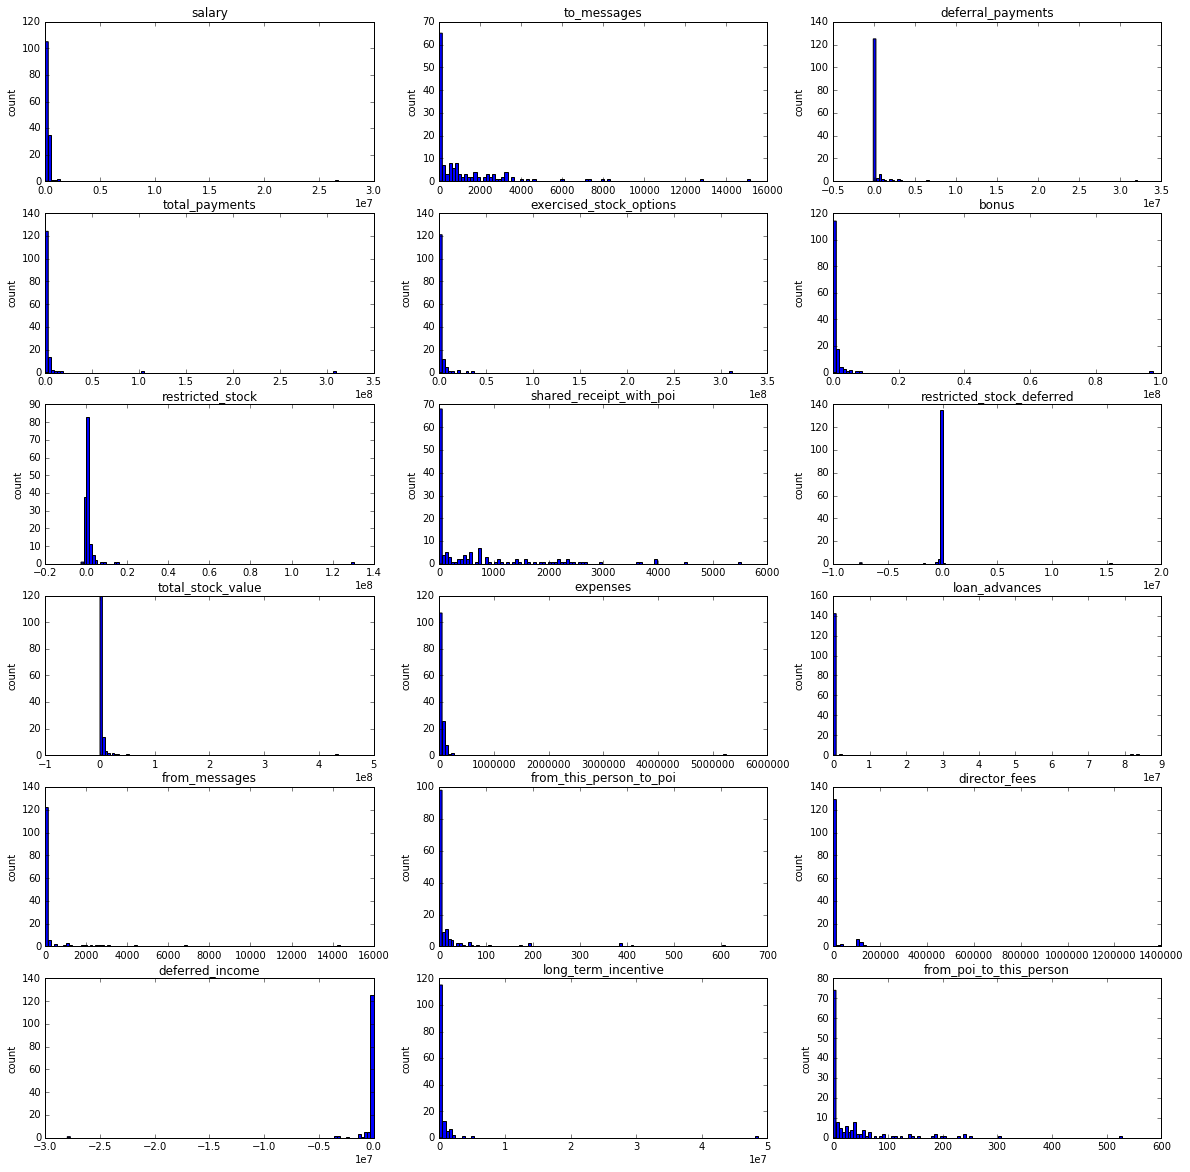

In [76]:
%matplotlib inline
### 20 histograms for features
# plt.figure(figsize= (80,80))
plt.rcParams["figure.figsize"] = (20,20)
f, axarr = plt.subplots(6, 3)


### the histogram of the data
### x: x coordinate values, y: y coordinate values
### r: row index, c: column index
### title: title of a subplot
def subplot_histogram(x, bins, r, c, title):
    axarr[r, c].hist(x, bins = bins)
    axarr[r, c].set_title(title)
    axarr[r, c].set_ylabel("count")

for i in range(len(features_list)):
    subplot_histogram(data[:,i],100,i/3,i%3,features_list[i])

# subplot_histogram(x,y,0,1,'affsdf')
# subplot_histogram(x,y,1,0,'aasdfsdf')
# subplot_histogram(x,y,1,1,'qqasdf')


plt.show()
# axarr[0, 0].plot(x, y)
# axarr[0, 0].set_title('Axis [0,0]')
# axarr[0, 1].scatter(x, y)
# axarr[0, 1].set_title('Axis [0,1]')
# axarr[1, 0].plot(x, y ** 2)
# axarr[1, 0].set_title('Axis [1,0]')
# axarr[1, 1].scatter(x, y ** 2)
# axarr[1, 1].set_title('Axis [1,1]')

Above shows 19 histograms. Every histogram has an outlier. 